# Entrega 1: #

## Ejercicio 9, Guia 1

El jugador Montiel convirtio los 12 penales que pateo al dia de la fecha en su carrera profesional

### a) Usando un prior beta de la probabilidad que tiene Montiel de convertir un penal, es decir tita ~ Beta(alpha, beta) encontrar la distribución posterior para tita y graficarla (definir a gusto los parámetros alpha y beta de la distribución).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

/home/matias/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


- Usamos como Prior Beta(13, 2) porque nos parece una distribucion que modela bien la probabilidad de que un jugador convierta un penal.

Recordar que:
- **Prior :** $p(\theta) = Beta(\theta | \alpha, \beta)$ = $\dfrac{\theta^{\alpha - 1} * ( 1 - \theta)^{\beta - 1}}{Beta(\alpha, \beta)}  $

- **Post no normalizado :** $p(\theta | D) \: \alpha \: L(\theta | D) * p(\theta)$

- **Post normalizado :** $\dfrac{p(\theta | D)}{Sum(p(\theta | D))} $

- **Likelihood :** $L(\theta \mid D) = \binom{n}{k} \theta^{k} (1 - \theta)^{n - k} \: \alpha \: \theta^k (1 - \theta)^{n - k} $


---

- Ademas, queremos encontrar la distribucion posterior para $\theta$. Esto es facilmente calculable:

**1. $\theta$ ~ $Beta$(13, 2), calculamos su *Likelihood***

- L($\theta$) = p(12/12 | $\theta$) = $\theta^{12}$
(* 12 goles en 12 penales *)

**2. Como ya conocemos su *Prior*:**

- p($\theta$) = $\theta^{12}$ * (1 - $\theta$)

**3. Podemos calcular la *Post*:**

- Post($\theta$ | 12/12) = L($\theta$) * p($\theta$)
- Post($\theta$ | 12/12) = $\theta^{12}$ * ($\theta^{12}$ * (1 - $\theta$))
- Post($\theta$ | 12/12) = $\theta^{24}$ * (1 - $\theta$)

**4. Casualmente nos da que la Posterior Analitica es:**
-  $Beta(13 + 12, 2 + 0) = Beta(25, 2) $


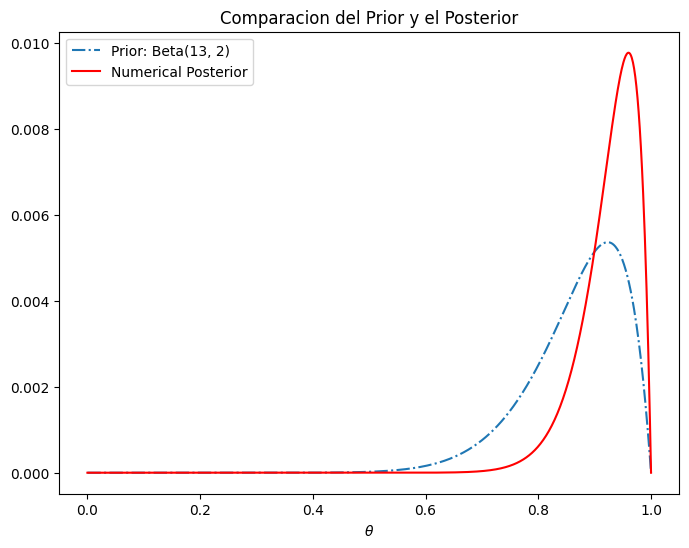

In [2]:
# alpha y beta de nuestra distribucion Beta.
alpha_prior = 13
beta_prior = 2

metidos = 12
tiros = 12
errados = 0     # No lo uso

# Generamos 1000 titas randoms
titas = np.linspace(0, 1, 1000)

prior = beta.pdf(titas, alpha_prior, beta_prior)
#prior = np.ones(len(titas))
prior /= np.sum(prior)

# Likelihood de que Montiel meta todos los penales
likelihood = titas ** metidos  

unnormalized_posterior = prior * likelihood
posterior = unnormalized_posterior / np.sum(unnormalized_posterior)

# Agregamos a alpha los exitos
alpha_post = alpha_prior + metidos

# Agregamos a beta los fracasos
beta_post = beta_prior + (tiros - metidos)

analytical_posterior = beta.pdf(titas, alpha_post, beta_post)
#analytical_posterior /= np.sum(analytical_posterior)  # Normalize

plt.figure(figsize=(8, 6))

# Prior
plt.plot(titas, prior, label=f'Prior: Beta({alpha_prior}, {beta_prior})', linestyle='-.')

# Numerical Posterior
plt.plot(titas, posterior, label='Numerical Posterior', linestyle='-', color = "red")

# Analytical Posterior
#plt.plot(titas, analytical_posterior, label=f'Analytical Posterior: Beta({alpha_post}, {beta_post})', linestyle='-.', color = "green")

plt.title('Comparacion del Prior y el Posterior')
plt.xlabel(r'$\theta$')
plt.legend()

plt.show()


### b) ¿Cual es la probabilidad de que convierta el penal número 13? ¿Cómo se compara con la estimación frecuentista?

Vamos a buscar la probabilidad de que Montiel convierta el penal numero 13.

Promedio predicho: 0.9279279279279279


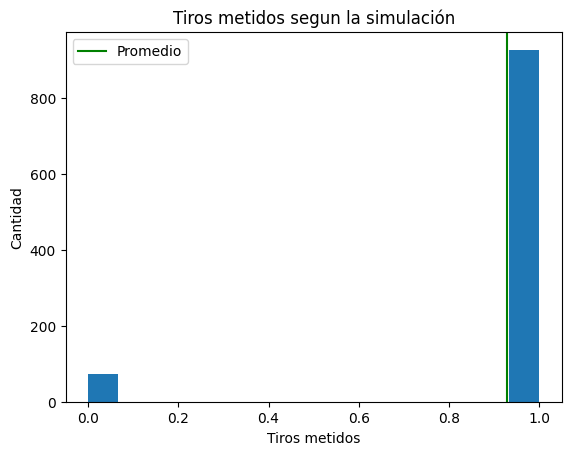

In [7]:
# Vamos a simular este experimento 10mil veces:

tiros_predichos = np.array([])
for i in range(1,1000):
    # Obtengo un tita randomizado calculado en el Posterior . (ver grafico a)
    tita_samples = np.random.choice(titas, p = posterior) 

    # Generamos aleatoriamente si metio o no el tiro.
    goles = np.random.binomial(1, tita_samples)

    # Guardamos los tiros en un array
    tiros_predichos = np.append(tiros_predichos, goles)

mean= np.mean(tiros_predichos)
print("Promedio predicho:", mean)
fig, ax = plt.subplots(1)
ax.hist(tiros_predichos, bins = 15)
ax.axvline(mean, color = "green", label = "Promedio")
ax.legend()
plt.xlabel("Tiros metidos")
plt.ylabel("Cantidad")
ax.set_title("Tiros metidos segun la simulación") 
plt.show()

- Segun los Bayesianos, tenemos un 92% de probabilidades de ver a Montiel meter el 13vo tiro.

- Mientras que los frecuentistas dirian que es el 100%.

---

### c)  ¿Qué supuestos estamos haciendo sobre el proceso que generó los datos?

- Estamos tomando por sentado muchas cosas que deberian influir en su precision, (arquero, pelota, etc).
- Estamos asumiendo que nadie mete el 100% de los tiros.

---


### d)  Haciendo simulaciones, crear un histograma de la distribución predicha de penales convertidos en los próximos 10 penales que ejecute Montiel (posterior predictive distribution).

Nuestro array de tiros metidos: [10. 10.  8. ... 10. 10. 10.]
Promedio predicho: 9.266026602660267


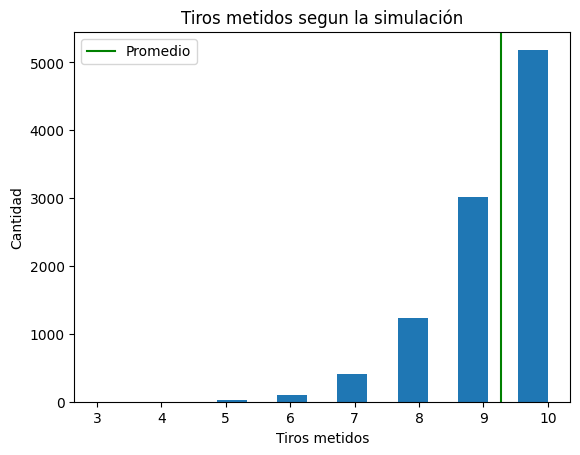

In [9]:
# Vamos a simular este experimento 10mil veces:

tiros_predichos = np.array([])
for i in range(1,10000):
    # Obtengo un tita randomizado calculado en el Posterior . (ver grafico a)
    tita_samples = np.random.choice(titas, p = posterior) 

    # Generamos aleatoriamente cuantos goles metió de los 10 tiros.
    goles = np.random.binomial(10, tita_samples)

    # Guardamos los tiros en un array
    tiros_predichos = np.append(tiros_predichos, goles)
print("Nuestro array de tiros metidos:", tiros_predichos)

mean= np.mean(tiros_predichos)
print("Promedio predicho:", mean)

fig, ax = plt.subplots(1)
ax.hist(tiros_predichos, bins = 15)
ax.axvline(mean, color = "green", label = "Promedio")
ax.legend()
plt.xlabel("Tiros metidos")
plt.ylabel("Cantidad")
ax.set_title("Tiros metidos segun la simulación") 
plt.show()

---

### e) Estimar la probabilidad de que Montiel meta al menos 8 de los próximos 10 penales que patee.

Teniendo el Histograma anterior, podriamos simplemente sumar los casos en que Montiel haya metido 8, 9 y 10 penales y dividirlos por la cantidad total de intentos. 

In [6]:
# Filtramos los casos en que Montiel haya metido >= 8 goles
tiros_predichos_filtrados = [tiro for tiro in tiros_predichos if tiro >= 8]

# Calculamos el promedio de que meta >= 8 goles.
print("La probabilidad que Montiel meta al menos 8 de los 10 penales es", len(tiros_predichos_filtrados) / len(tiros_predichos))

La probabilidad que Montiel meta al menos 8 de los 10 penales es 0.968996899689969
